In [2]:
%reload_ext autoreload
%autoreload 2

In [4]:
from cereeberus import  MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import MDS

In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kmapper as km
from sklearn.cluster import DBSCAN
import networkx as nx
import multiprocessing as mp
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from itertools import combinations_with_replacement
import multiprocessing as mp
from tqdm import tqdm
import pickle

from cereeberus import Interleave, ReebGraph, MapperGraph
import image_mapper_comparison as imc

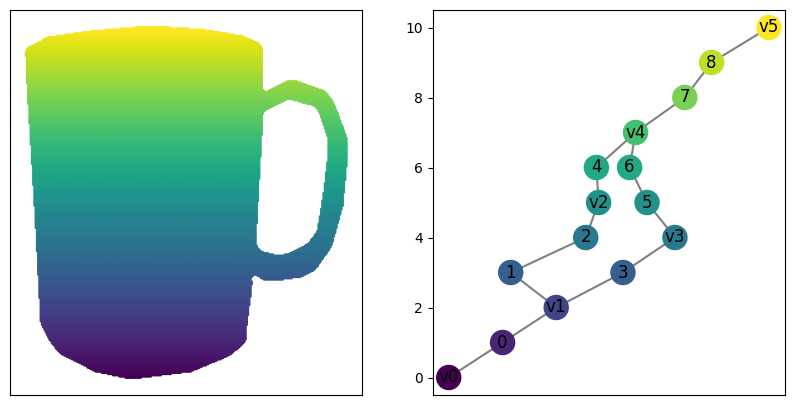

In [ ]:
points = imc.get_point_cloud_from_image("MPEG7_dataset/Cups/cup-7.gif", rotate_angle=None)
G = imc.mapper_of_image(points)
G = imc.normalize_node_heights(G)
mapperG = imc.generate_mapper(G)

# Extract y-values (second column of points) for color mapping
y_values = points[:, 1]


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the point cloud
ax[0].scatter(points[:, 0], points[:, 1], c= y_values, s=1)
#remove the axis numbers
ax[0].set_xticks([])
ax[0].set_yticks([])


mapperG.draw(ax=ax[1])
# plt.savefig("cup_mapper.png", dpi=300)
plt.show()

# 1. Files we will compare: (not all will be used for actual experiments)

In [12]:
apple_files = ["MPEG7_dataset/Apples/apple-1.gif",
               "MPEG7_dataset/Apples/apple-2.gif",
               "MPEG7_dataset/Apples/apple-3.gif",
               "MPEG7_dataset/Apples/apple-4.gif",
               "MPEG7_dataset/Apples/apple-5.gif",
               "MPEG7_dataset/Apples/apple-6.gif",
               "MPEG7_dataset/Apples/apple-7.gif",
               "MPEG7_dataset/Apples/apple-8.gif",
               "MPEG7_dataset/Apples/apple-10.gif",
               "MPEG7_dataset/Apples/apple-11.gif"]

cup_files_without_join = ["MPEG7_dataset/Cups/cup-11.gif",
                          "MPEG7_dataset/Cups/cup-12.gif",
                          "MPEG7_dataset/Cups/cup-18.gif"]

cup_files_with_join = ["MPEG7_dataset/Cups/cup-8.gif",
                        "MPEG7_dataset/Cups/cup-9.gif",
                       "MPEG7_dataset/Cups/cup-7.gif",
                       "MPEG7_dataset/Cups/cup-4.gif",
                       "MPEG7_dataset/Cups/cup-1.gif",
                       "MPEG7_dataset/Cups/cup-19.gif",
                       "MPEG7_dataset/Cups/cup-20.gif"]

cup_files = cup_files_without_join + cup_files_with_join

crown_files = ["MPEG7_dataset/Crowns/crown-1.gif",
               "MPEG7_dataset/Crowns/crown-2.gif",
               "MPEG7_dataset/Crowns/crown-3.gif",
               "MPEG7_dataset/Crowns/crown-4.gif",
               "MPEG7_dataset/Crowns/crown-6.gif",
               "MPEG7_dataset/Crowns/crown-7.gif",
               "MPEG7_dataset/Crowns/crown-13.gif",
               "MPEG7_dataset/Crowns/crown-16.gif",
               "MPEG7_dataset/Crowns/crown-17.gif",
               "MPEG7_dataset/Crowns/crown-19.gif"]

heart_files = ["MPEG7_dataset/Hearts/Heart-1.gif",
               "MPEG7_dataset/Hearts/Heart-2.gif",
               "MPEG7_dataset/Hearts/Heart-12.gif",
               "MPEG7_dataset/Hearts/Heart-20.gif", 
               "MPEG7_dataset/Hearts/Heart-5.gif", 
               "MPEG7_dataset/Hearts/Heart-6.gif",
               "MPEG7_dataset/Hearts/Heart-7.gif",
               "MPEG7_dataset/Hearts/Heart-8.gif",
               "MPEG7_dataset/Hearts/Heart-9.gif",
               "MPEG7_dataset/Hearts/Heart-10.gif"]


fork_files = ["MPEG7_dataset/Forks/fork-20.gif",
                "MPEG7_dataset/Forks/fork-2.gif",
                "MPEG7_dataset/Forks/fork-3.gif",
                "MPEG7_dataset/Forks/fork-4.gif",
                "MPEG7_dataset/Forks/fork-5.gif",
                "MPEG7_dataset/Forks/fork-6.gif",
                "MPEG7_dataset/Forks/fork-7.gif",
                "MPEG7_dataset/Forks/fork-8.gif",
                "MPEG7_dataset/Forks/fork-16.gif",
                "MPEG7_dataset/Forks/fork-15.gif"]


horseshoes_files = ["MPEG7_dataset/Horseshoes/horseshoe-1.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-2.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-3.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-20.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-13.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-6.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-7.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-8.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-9.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-10.gif"]


deer_files = ["MPEG7_dataset/Deers/deer-1.gif",
                "MPEG7_dataset/Deers/deer-2.gif",
                "MPEG7_dataset/Deers/deer-3.gif",
                "MPEG7_dataset/Deers/deer-4.gif",
                "MPEG7_dataset/Deers/deer-5.gif",
                "MPEG7_dataset/Deers/deer-6.gif",
                "MPEG7_dataset/Deers/deer-7.gif",
                "MPEG7_dataset/Deers/deer-8.gif",
                "MPEG7_dataset/Deers/deer-9.gif",
                "MPEG7_dataset/Deers/deer-10.gif"]

octopus_files = ["MPEG7_dataset/Octopi/octopus-1.gif",
                "MPEG7_dataset/Octopi/octopus-2.gif",
                "MPEG7_dataset/Octopi/octopus-20.gif",
                "MPEG7_dataset/Octopi/octopus-4.gif",
                "MPEG7_dataset/Octopi/octopus-5.gif",
                "MPEG7_dataset/Octopi/octopus-6.gif",
                "MPEG7_dataset/Octopi/octopus-7.gif",
                "MPEG7_dataset/Octopi/octopus-8.gif",
                "MPEG7_dataset/Octopi/octopus-9.gif",
                "MPEG7_dataset/Octopi/octopus-10.gif"]

seasnake_files = ["MPEG7_dataset/Seasnakes/sea_snake-1.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-2.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-3.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-4.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-11.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-6.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-7.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-8.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-20.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-10.gif"]

In [15]:
# for i in range(10):
#     # imc.save_rotated_image(cup_files[i], 90)
#     points = imc.get_point_cloud_from_image(crown_files[i], rotate_angle=0)
#     G = imc.mapper_of_image(points)
#     G = imc.normalize_node_heights(G)

#     fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#     # plot mapper
#     pos = nx.spring_layout(G)
#     for node_id in G.nodes:
#         if 'fx' in G.nodes[node_id]:  # Ensure 'fx' exists
#             pos[node_id][1] = G.nodes[node_id]['fx']

#     # check if G has more than one connected component
#     if nx.number_connected_components(G) > 1:
#         print(f"Image {crown_files[i]} has more than one connected component")
#         continue
#     # Plot the point cloud
#     ax[0].scatter(points[:, 0], points[:, 1], s=1)

#     nx.draw(G, pos=pos, node_size=50, with_labels=True, font_size=12,
#         node_color='lightblue', ax=ax[1])
#     ax[1].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
#     ax[1].grid(True)  # Add a grid for better visualization

# 2. Generate mappers for some chosen shapes

In [17]:
apple_mappers = [imc.generate_mapper(apple_files[i]) for i in range(10)]
cup_mappers = [imc.generate_mapper(cup_files[i]) for i in range(10)]
crown_mappers = [imc.generate_mapper(crown_files[i]) for i in range(10)]
fork_mappers = [imc.generate_mapper(fork_files[i]) for i in range(10)]
heart_mappers = [imc.generate_mapper(heart_files[i]) for i in range(10)]
horseshoe_mappers = [imc.generate_mapper(horseshoes_files[i]) for i in range(10)]
seasnake_mappers = [imc.generate_mapper(seasnake_files[i]) for i in range(10)]


In [18]:
apple_dicts = {i+1: apple_mappers[i] for i in range(len(apple_mappers))}
cup_dicts = {i+1: cup_mappers[i] for i in range(len(cup_mappers))}
crown_dicts = {i+1: crown_mappers[i] for i in range(len(crown_mappers))}
fork_dicts = {i+1: fork_mappers[i] for i in range(len(fork_mappers))}
heart_dicts = {i+1: heart_mappers[i] for i in range(len(heart_mappers))}
horseshoe_dicts = {i+1: horseshoe_mappers[i] for i in range(len(horseshoe_mappers))}
seasnake_dicts = {i+1: seasnake_mappers[i] for i in range(len(seasnake_mappers))}    

In [27]:
# create a large dataframe with apple0, apple1, apple2, ... cup0, cup1, cup2, ... and keep it empty
categories = ['apple', 'cup', 'crown', 'fork', 'heart', 'horseshoe', 'seasnake']
names = [categories[i]+ str(j+1) for i in range(len(categories)) for j in range(10)]
df = pd.DataFrame(index=names, columns=names, dtype=float)

In [28]:
df.columns

Index(['apple1', 'apple2', 'apple3', 'apple4', 'apple5', 'apple6', 'apple7',
       'apple8', 'apple9', 'apple10', 'cup1', 'cup2', 'cup3', 'cup4', 'cup5',
       'cup6', 'cup7', 'cup8', 'cup9', 'cup10', 'crown1', 'crown2', 'crown3',
       'crown4', 'crown5', 'crown6', 'crown7', 'crown8', 'crown9', 'crown10',
       'fork1', 'fork2', 'fork3', 'fork4', 'fork5', 'fork6', 'fork7', 'fork8',
       'fork9', 'fork10', 'heart1', 'heart2', 'heart3', 'heart4', 'heart5',
       'heart6', 'heart7', 'heart8', 'heart9', 'heart10', 'horseshoe1',
       'horseshoe2', 'horseshoe3', 'horseshoe4', 'horseshoe5', 'horseshoe6',
       'horseshoe7', 'horseshoe8', 'horseshoe9', 'horseshoe10', 'seasnake1',
       'seasnake2', 'seasnake3', 'seasnake4', 'seasnake5', 'seasnake6',
       'seasnake7', 'seasnake8', 'seasnake9', 'seasnake10'],
      dtype='object')

In [42]:
SAVE_FILE = "interleave_results.pkl"

categories = ["apple", "cup", "crown","fork", "heart", "horseshoe", "seasnake"]
mapper_lists = [apple_mappers, cup_mappers, crown_mappers, fork_mappers, heart_mappers, horseshoe_mappers, seasnake_mappers]

# #test run with only apple and cup
# categories = ["apple", "cup"]
# mapper_lists = [apple_mappers, cup_mappers]

#flatten the list of mappers
mapper_list = sum(mapper_lists, [])

# dictionary mapping mapper objects to their names
mapper_dict = {mapper: name for mapper, name in zip(mapper_list, names)}

def save_results(results):
    """Save results periodically to a file."""
    with open(SAVE_FILE, "wb") as f:
        pickle.dump(results, f)

def load_results():
    """Load previously saved results if available."""
    if os.path.exists(SAVE_FILE):
        with open(SAVE_FILE, "rb") as f:
            return pickle.load(f)
    return {}

def pairwise_interleave(mapperpairs):
    """Interleave function to be applied in parallel."""
    mapper1, mapper2 = mapperpairs
    return Interleave(mapper1, mapper2).fit()

def parallel_compute_interleave(mapper_list):
    
    """Compute interleaving in parallel for all mapper pairs (both intra- and cross-category)."""
    mapper_pairs = list(combinations_with_replacement(mapper_list, 2))  # Generate all pairs

    num_procs = 64
    print(f"Using {num_procs} cores")

    # Load existing results
    result_dict = load_results()

    # Filter out already computed pairs
    remaining_pairs = [p for p in mapper_pairs if (mapper_dict[p[0]], mapper_dict[p[1]]) not in result_dict]



    with mp.get_context("fork").Pool(num_procs) as pool:
        for (m1, m2), res in zip(remaining_pairs, tqdm(pool.imap(pairwise_interleave, remaining_pairs), total=len(remaining_pairs), desc="Processing pairs")):
            key = (mapper_dict[m1], mapper_dict[m2])
            result_dict[key] = res
            
            # Save results every 10 iterations
            if len(result_dict) % 10 == 0:
                save_results(result_dict)

    # Final save after completion
    save_results(result_dict)
    return result_dict


In [43]:
result_dict = parallel_compute_interleave(mapper_list)

Using 64 cores


Processing pairs: 100%|█████████▉| 2274/2275 [04:20<00:00,  8.73it/s]


In [45]:
with open(SAVE_FILE, "rb") as f:
    results = pickle.load(f)

# now `results` is a dictionary
print(results.keys())
print(len(results))

dict_keys([('apple1', 'apple1'), ('apple1', 'apple2'), ('apple1', 'apple3'), ('apple1', 'apple4'), ('apple1', 'apple5'), ('apple1', 'apple6'), ('apple1', 'apple7'), ('apple1', 'apple8'), ('apple1', 'apple9'), ('apple1', 'apple10'), ('apple1', 'cup1'), ('apple1', 'cup2'), ('apple1', 'cup3'), ('apple1', 'cup4'), ('apple1', 'cup5'), ('apple1', 'cup6'), ('apple1', 'cup7'), ('apple1', 'cup8'), ('apple1', 'cup9'), ('apple1', 'cup10'), ('apple2', 'apple2'), ('apple2', 'apple3'), ('apple2', 'apple4'), ('apple2', 'apple5'), ('apple2', 'apple6'), ('apple2', 'apple7'), ('apple2', 'apple8'), ('apple2', 'apple9'), ('apple2', 'apple10'), ('apple2', 'cup1'), ('apple2', 'cup2'), ('apple2', 'cup3'), ('apple2', 'cup4'), ('apple2', 'cup5'), ('apple2', 'cup6'), ('apple2', 'cup7'), ('apple2', 'cup8'), ('apple2', 'cup9'), ('apple2', 'cup10'), ('apple3', 'apple3'), ('apple3', 'apple4'), ('apple3', 'apple5'), ('apple3', 'apple6'), ('apple3', 'apple7'), ('apple3', 'apple8'), ('apple3', 'apple9'), ('apple3', 'a

In [46]:
# create a new empty dataframe with the same columns as the original dataframe

categories = ['apple', 'cup', 'crown', 'fork', 'horseshoe', 'heart', 'seasnake']
names = [categories[i]+ str(j+1) for i in range(len(categories)) for j in range(10)]

newdf = pd.DataFrame(index=names, columns=names)

In [50]:
result_dict

{('apple1', 'apple1'): 0,
 ('apple1', 'apple2'): 0,
 ('apple1', 'apple3'): 0,
 ('apple1', 'apple4'): 1,
 ('apple1', 'apple5'): 0,
 ('apple1', 'apple6'): 0,
 ('apple1', 'apple7'): 0,
 ('apple1', 'apple8'): 0,
 ('apple1', 'apple9'): 0,
 ('apple1', 'apple10'): 1,
 ('apple1', 'cup1'): 3,
 ('apple1', 'cup2'): 3,
 ('apple1', 'cup3'): 3,
 ('apple1', 'cup4'): 0,
 ('apple1', 'cup5'): 2,
 ('apple1', 'cup6'): 2,
 ('apple1', 'cup7'): 2,
 ('apple1', 'cup8'): 2,
 ('apple1', 'cup9'): 2,
 ('apple1', 'cup10'): 3,
 ('apple2', 'apple2'): 0,
 ('apple2', 'apple3'): 0,
 ('apple2', 'apple4'): 1,
 ('apple2', 'apple5'): 0,
 ('apple2', 'apple6'): 0,
 ('apple2', 'apple7'): 0,
 ('apple2', 'apple8'): 0,
 ('apple2', 'apple9'): 0,
 ('apple2', 'apple10'): 1,
 ('apple2', 'cup1'): 3,
 ('apple2', 'cup2'): 3,
 ('apple2', 'cup3'): 3,
 ('apple2', 'cup4'): 0,
 ('apple2', 'cup5'): 2,
 ('apple2', 'cup6'): 2,
 ('apple2', 'cup7'): 2,
 ('apple2', 'cup8'): 2,
 ('apple2', 'cup9'): 2,
 ('apple2', 'cup10'): 3,
 ('apple3', 'apple3'):

In [51]:
for key, value in result_dict.items():
    # check if there is a row column with the same name

    df.loc[key[0], key[1]] = value
    df.loc[key[1], key[0]] = value

In [48]:
# df to csv

df.to_csv('distance_results.csv')

In [52]:
df.head()

,apple1,apple2,apple3,apple4,apple5,apple6,apple7,apple8,apple9,apple10,...,seasnake1,seasnake2,seasnake3,seasnake4,seasnake5,seasnake6,seasnake7,seasnake8,seasnake9,seasnake10
apple1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,3.0,1.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0
apple2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,3.0,1.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0
apple3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,3.0,1.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0
apple4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,3.0,1.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0
apple5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,3.0,1.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0


# 3. Visulalize the objects for the paper

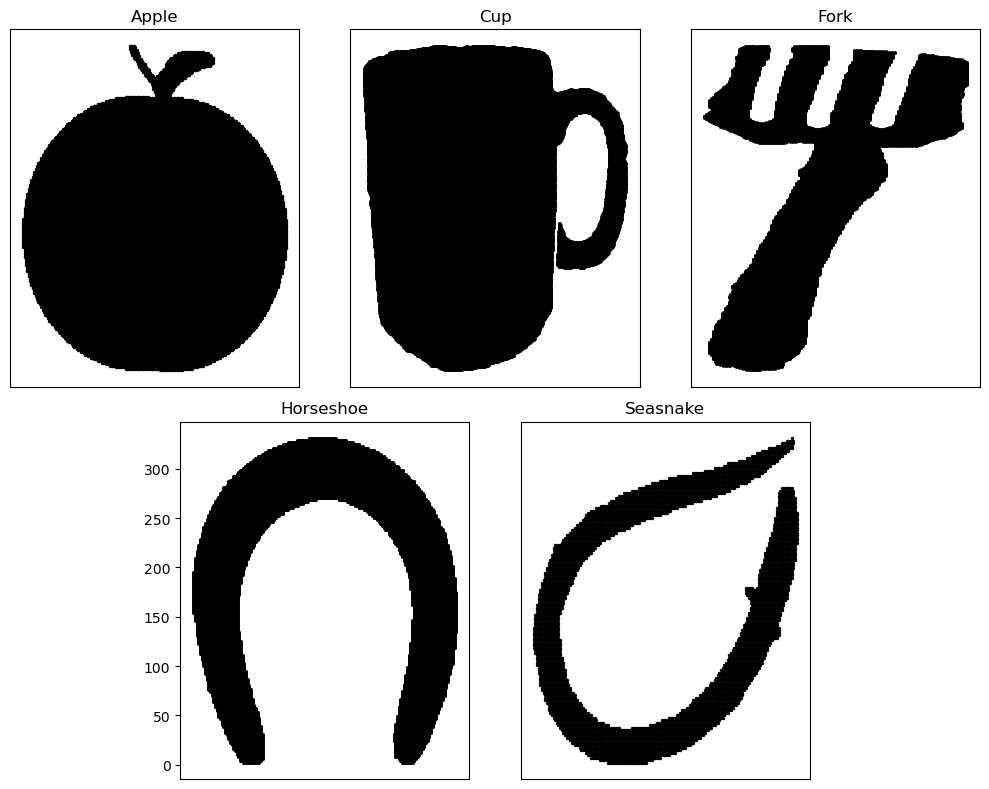

In [ ]:
apple = apple_files[0]
cup = cup_files[7]
fork = fork_files[3]
horseshoe = horseshoes_files[0]
seasnake = seasnake_files[5]

# Create figure with the right size
fig = plt.figure(figsize=(10, 8))

# Create subplots using subplot2grid
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(2, 6), loc=(0, 2), colspan=2)
ax3 = plt.subplot2grid(shape=(2, 6), loc=(0, 4), colspan=2)
ax4 = plt.subplot2grid(shape=(2, 6), loc=(1, 1), colspan=2)
ax5 = plt.subplot2grid(shape=(2, 6), loc=(1, 3), colspan=2)

# Get point clouds
apoints = get_point_cloud_from_image(apple, rotate_angle=0)
cpoints = get_point_cloud_from_image(cup, rotate_angle=0)
fpoints = get_point_cloud_from_image(fork, rotate_angle=0)
hpoints = get_point_cloud_from_image(horseshoe, rotate_angle=0)
spoints = get_point_cloud_from_image(seasnake, rotate_angle=0)

# Scatter plots (all black points)
ax1.scatter(apoints[:, 0], apoints[:, 1], s=2, color='black')  # or c='k'
ax1.set_title("Apple")
ax1.set_xticks([])
ax1.set_yticks([])

ax2.scatter(cpoints[:, 0], cpoints[:, 1], s=1, color='black')
ax2.set_title("Cup")
ax2.set_xticks([])
ax2.set_yticks([])

ax3.scatter(fpoints[:, 0], fpoints[:, 1], s=1, color='black')
ax3.set_title("Fork")
ax3.set_xticks([])
ax3.set_yticks([])

ax4.scatter(hpoints[:, 0], hpoints[:, 1], s=1, color='black')
ax4.set_title("Horseshoe")
ax4.set_xticks([])
ax4.set_yticks

ax5.scatter(spoints[:, 0], spoints[:, 1], s=2, color='black')
ax5.set_title("Seasnake")
ax5.set_xticks([])
ax5.set_yticks([])
plt.tight_layout()
plt.savefig("point_clouds.png", dpi=300)
plt.show()
